In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load DataSet
filename='Project_survey.csv'
data=read_csv(filename)
data.head()

,Age,Gender,family_history,treatment
0,37.0,Female,No,Yes
1,44.0,M,No,No
2,32.0,Male,No,No
3,31.0,Male,Yes,Yes
4,31.0,Male,No,No


In [3]:
data.shape

(1259, 4)

In [4]:
data.dtypes

Age               float64
Gender             object
family_history     object
treatment          object
dtype: object

In [5]:
data.tail()

,Age,Gender,family_history,treatment
1254,26.0,male,No,Yes
1255,32.0,Male,Yes,Yes
1256,34.0,male,Yes,Yes
1257,46.0,f,No,No
1258,25.0,Male,Yes,Yes


In [6]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail","A little about you","p"]

In [8]:
for (row, col) in data.iterrows():

    if str.lower(col.Gender) in male_str:
        data['Gender'].replace(to_replace=col.Gender, value='Male', inplace=True)

    if str.lower(col.Gender) in female_str:
        data['Gender'].replace(to_replace=col.Gender, value='Female', inplace=True)

    if str.lower(col.Gender) in trans_str:
        data['Gender'].replace(to_replace=col.Gender, value='Trans', inplace=True)

In [9]:
data['Gender'].replace(['Female','Male','Trans'],[0,1,2],inplace=True)
data['family_history'].replace(['No','Yes'],[0,1],inplace=True)

In [10]:
data['Age']=data['Age'].fillna(0).astype(int)

In [11]:
data.head()

,Age,Gender,family_history,treatment
0,37,0,0,Yes
1,44,1,0,No
2,32,1,0,No
3,31,1,1,Yes
4,31,1,0,No


In [12]:
data.tail()

,Age,Gender,family_history,treatment
1254,26,1,0,Yes
1255,32,1,1,Yes
1256,34,1,1,Yes
1257,46,0,0,No
1258,25,1,1,Yes


In [13]:
data.dtypes

Age                int32
Gender             int64
family_history     int64
treatment         object
dtype: object

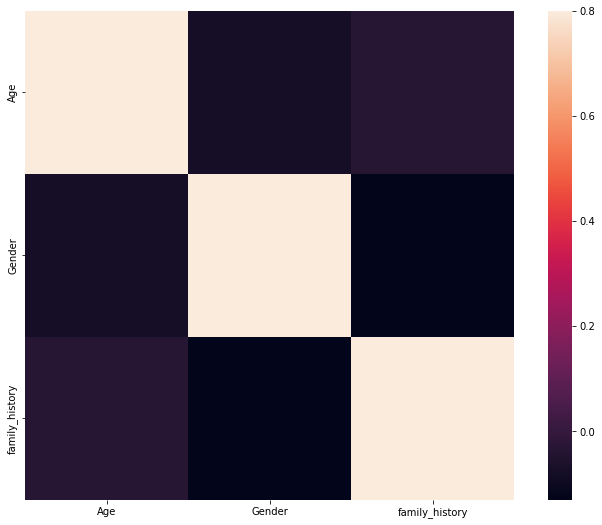

In [42]:
import seaborn as sns
#Covariance Matrix
covmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(covmat, vmax=.8, square=True);
plt.show()

In [14]:
# Fitting the model
from sklearn.model_selection import train_test_split

In [15]:
X=data.drop(columns='treatment')

In [16]:
X.head()

,Age,Gender,family_history
0,37,0,0
1,44,1,0
2,32,1,0
3,31,1,1
4,31,1,0


In [17]:
y=data.drop(columns=['Age','family_history','Gender'])

In [18]:
y.head()

,treatment
0,Yes
1,No
2,No
3,Yes
4,No


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

# Decision Tree Classifier

In [21]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()

In [22]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
test=clf.predict(X_test)
test

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 

In [25]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [26]:
from sklearn.metrics import accuracy_score
import joblib

In [27]:
accuracy=accuracy_score(y_test,test)

In [28]:
accuracy

0.6746031746031746

In [29]:
joblib.dump(clf,'Project_model/Dec_project.joblib')

['Project_model/Dec_project.joblib']

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [31]:
c_matrix = confusion_matrix(y_test, test)
c_matrix

array([[112,  45],
       [ 78, 143]], dtype=int64)

c:\users\abhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


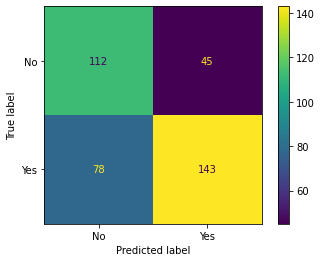

In [32]:
plot_confusion_matrix(clf, X_test, y_test)

In [43]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test))

              precision    recall  f1-score   support

          No       0.59      0.71      0.65       157
         Yes       0.76      0.65      0.70       221

    accuracy                           0.67       378
   macro avg       0.68      0.68      0.67       378
weighted avg       0.69      0.67      0.68       378



# Random Forest Classifier

In [47]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier()
clf1 = clf1.fit(X_train,np.ravel(y_train))

In [58]:
test1=clf1.predict(X_test)
test1

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [59]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [60]:
from sklearn.metrics import accuracy_score
import joblib

In [61]:
accuracy=accuracy_score(y_test,test1)
accuracy

0.6640211640211641

In [62]:
joblib.dump(clf,'Project_model/Random_project.joblib')

['Project_model/Random_project.joblib']

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [64]:
c_matrix = confusion_matrix(y_test, test1)
c_matrix

array([[105,  52],
       [ 75, 146]], dtype=int64)

c:\users\abhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


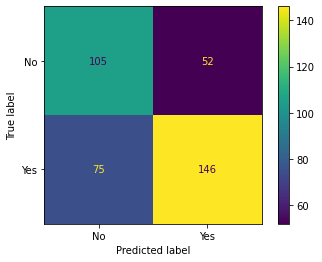

In [65]:
plot_confusion_matrix(clf1, X_test, y_test)

In [66]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test1))

              precision    recall  f1-score   support

          No       0.58      0.67      0.62       157
         Yes       0.74      0.66      0.70       221

    accuracy                           0.66       378
   macro avg       0.66      0.66      0.66       378
weighted avg       0.67      0.66      0.67       378



# GuassianNB

In [68]:
#GuassianNB
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb=gnb.fit(X_train,np.ravel(y_train))

In [76]:
test2=gnb.predict(X_test)
test2

array(['No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes

In [77]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [72]:
from sklearn.metrics import accuracy_score
import joblib

In [78]:
accuracy=accuracy_score(y_test,test2)
accuracy

0.6798941798941799

In [79]:
joblib.dump(clf,'Project_model/GuassianNB_project.joblib')

['Project_model/GuassianNB_project.joblib']

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
c_matrix = confusion_matrix(y_test, test2)
c_matrix

array([[109,  48],
       [ 73, 148]], dtype=int64)

c:\users\abhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


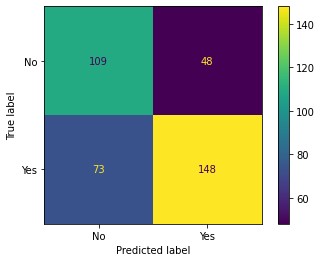

In [81]:
plot_confusion_matrix(gnb, X_test, y_test)

In [82]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test2))

              precision    recall  f1-score   support

          No       0.60      0.69      0.64       157
         Yes       0.76      0.67      0.71       221

    accuracy                           0.68       378
   macro avg       0.68      0.68      0.68       378
weighted avg       0.69      0.68      0.68       378



# Linear Regression

In [88]:
#Linear Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,np.ravel(y_train))

LogisticRegression()

In [89]:
test4=lr.predict(X_test)
test4

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No',
   

In [90]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [91]:
from sklearn.metrics import accuracy_score
import joblib

In [92]:
accuracy=accuracy_score(y_test,test4)
accuracy

0.6798941798941799

In [93]:
joblib.dump(clf,'Project_model/linear_project.joblib')

['Project_model/linear_project.joblib']

In [94]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt

In [95]:
c_matrix = confusion_matrix(y_test, test4)
c_matrix

array([[121,  36],
       [ 85, 136]], dtype=int64)

c:\users\abhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


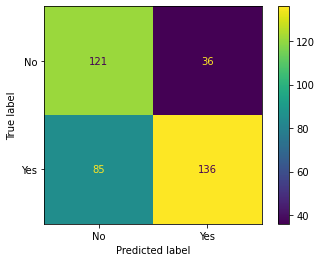

In [96]:
plot_confusion_matrix(lr, X_test, y_test)

In [97]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [98]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test4))

              precision    recall  f1-score   support

          No       0.59      0.77      0.67       157
         Yes       0.79      0.62      0.69       221

    accuracy                           0.68       378
   macro avg       0.69      0.69      0.68       378
weighted avg       0.71      0.68      0.68       378



# ExtraTree Classifier

In [99]:
#Extratree Classifier
from sklearn.ensemble import ExtraTreesClassifier

In [100]:
clf3=ExtraTreesClassifier()

In [103]:
clf3.fit(X_train,np.ravel(y_train))
test5=clf3.predict(X_test)
test5

array(['No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 

In [104]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [105]:
from sklearn.metrics import accuracy_score
import joblib

In [106]:
accuracy=accuracy_score(y_test,test5)
accuracy

0.6746031746031746

In [107]:
joblib.dump(clf,'Project_model/ExtraTreesClassifier_project.joblib')

['Project_model/ExtraTreesClassifier_project.joblib']

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot as plt
c_matrix = confusion_matrix(y_test, test5)
c_matrix

array([[112,  45],
       [ 78, 143]], dtype=int64)

c:\users\abhin\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


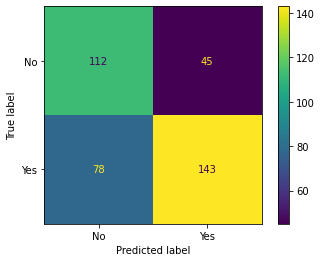

In [109]:
plot_confusion_matrix(clf3, X_test, y_test)

In [110]:
y_test

,treatment
123,No
229,Yes
580,Yes
1164,Yes
893,No
...,...
1169,Yes
1212,Yes
678,No
1184,Yes


In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test5))

              precision    recall  f1-score   support

          No       0.59      0.71      0.65       157
         Yes       0.76      0.65      0.70       221

    accuracy                           0.67       378
   macro avg       0.68      0.68      0.67       378
weighted avg       0.69      0.67      0.68       378

